# INFO 348 Final Project

In [1]:
#import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.geocoders import Nominatim
import numpy as np
import scipy.stats as st
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Part 1: Data Wrangling

### 1. Demographics Dataset

In [3]:
# Read the Population by Age and Sex dataset from StatsAmerica
# This dataset includes population estimates by age and sex for U.S. states and counties from 2000 to 2019

demographics_df = pd.read_csv("Population by Age and Sex - US, States, Counties.csv")
demographics_df

IBRC_Geo_ID  Statefips  Countyfips  Description  Year  \
0                0          0           0         U.S.  2000   
1                0          0           0         U.S.  2001   
2                0          0           0         U.S.  2002   
3                0          0           0         U.S.  2003   
4                0          0           0         U.S.  2004   
...            ...        ...         ...          ...   ...   
63877        72000         72           0  Puerto Rico  2015   
63878        72000         72           0  Puerto Rico  2016   
63879        72000         72           0  Puerto Rico  2017   
63880        72000         72           0  Puerto Rico  2018   
63881        72000         72           0  Puerto Rico  2019   

       Total Population  Population 0-4  Population 5-17  Population 18-24  \
0           282162411.0      19178293.0       53197896.0        27315274.0   
1           284968955.0      19298217.0       53372958.0        27992652.0   
2           287625193.0      19429192.0       53507265.0        28480708.0   
3           290107933.0      19592446.0       53508312.0        28916746.0   
4           292805298.0      19785885.0       53511850.0        29302179.0   
...                 ...             ...              ...               ...   
63877         3473232.0        172208.0         559788.0          348790.0   
63878         3406672.0        160089.0         533468.0          336650.0   
63879         3325286.0        144751.0         506785.0          322684.0   
63880         3193354.0        124487.0         467385.0          304190.0   
63881         3193694.0        117482.0         455249.0          303277.0   

       Population 25-44  Population 45-64  Population 65+  \
0            84973340.0        62428040.0      35069568.0   
1            84523274.0        64491563.0      35290291.0   
2            83990295.0        66695526.0      35522207.0   
3            83398001.0        68828899.0      35863529.0   
4            83066831.0        70935234.0      36203319.0   
...                 ...               ...             ...   
63877          873430.0          889620.0        629396.0   
63878          851966.0          881072.0        643427.0   
63879          827176.0          869105.0        654785.0   
63880          787277.0          848607.0        661408.0   
63881          793549.0          844481.0        679656.0   

       Population Under 18  Population 18-54  Population 55+  Male Population  \
0               72376189.0       150287588.0      59498634.0      138443407.0   
1               72671175.0       151902194.0      60395586.0      139891492.0   
2               72936457.0       152463197.0      62225539.0      141230559.0   
3               73100758.0       153134701.0      63872474.0      142428897.0   
4               73297735.0       153998940.0      65508623.0      143828012.0   
...                    ...               ...             ...              ...   
63877             731996.0         1678391.0       1062845.0        1656361.0   
63878             693557.0         1637171.0       1075944.0        1620266.0   
63879             651536.0         1588502.0       1085248.0        1580779.0   
63880             591872.0         1513781.0       1087701.0        1517003.0   
63881             572731.0         1512881.0       1108082.0        1515598.0   

       Female Population  
0            143719004.0  
1            145077463.0  
2            146394634.0  
3            147679036.0  
4            148977286.0  
...                  ...  
63877          1816871.0  
63878          1786406.0  
63879          1744505.0  
63880          1676341.0  
63881          1677955.0  

[63882 rows x 17 columns]

In [5]:
# Check for missing values in each column of the Demographics dataset
# The output indicates that there are no missing values in any of the dataset columns
demographics_df.isnull().sum()

IBRC_Geo_ID            0
Statefips              0
Countyfips             0
Description            0
Year                   0
Total Population       0
Population 0-4         0
Population 5-17        0
Population 18-24       0
Population 25-44       0
Population 45-64       0
Population 65+         0
Population Under 18    0
Population 18-54       0
Population 55+         0
Male Population        0
Female Population      0
dtype: int64

### 2. Income Dataset

In [7]:
# Read the BEA Per Capita Income dataset from StatsAmerica
# This dataset includes estimates of per capita personal income for U.S. states and counties from 2001 to 2023
income_df = pd.read_csv("BEA - US, States, Counties - Per Capita Income.csv")
income_df

IBRC_Geo_ID  Statefips  Countyfips        Description  Year  \
0                0          0           0               U.S.  2001   
1                0          0           0               U.S.  2002   
2                0          0           0               U.S.  2003   
3                0          0           0               U.S.  2004   
4                0          0           0               U.S.  2005   
...            ...        ...         ...                ...   ...   
72905        56045         56          45  Weston County, WY  2019   
72906        56045         56          45  Weston County, WY  2020   
72907        56045         56          45  Weston County, WY  2021   
72908        56045         56          45  Weston County, WY  2022   
72909        56045         56          45  Weston County, WY  2023   

       BEA Per Capita Personal Income  
0                               31548  
1                               31801  
2                               32659  
3                               34183  
4                               35669  
...                               ...  
72905                           45537  
72906                           47876  
72907                           50512  
72908                           51090  
72909                           54380  

[72910 rows x 6 columns]

In [9]:
# Check for missing values in each column of the Income dataset
# The output indicates that there are no missing values in any of the dataset columns
income_df.isnull().sum()

IBRC_Geo_ID                       0
Statefips                         0
Countyfips                        0
Description                       0
Year                              0
BEA Per Capita Personal Income    0
dtype: int64

### 3. Join the Demographics and Income Datasets

In [11]:
# Join the Population by Age and Sex dataset with the BEA Per Capita Income dataset for income analysis by demographics
# Use common columns (Statefips, Countyfips, and Year) as keys for joining

# Check the types of Statefips, Countyfips, and Year columns to ensure consistent formats
print(demographics_df['Statefips'].dtypes)
print(income_df['Statefips'].dtypes)

print(demographics_df['Countyfips'].dtypes)
print(income_df['Countyfips'].dtypes)

print(demographics_df['Year'].dtypes)
print(income_df['Year'].dtypes)

int64
int64
int64
int64
int64
int64


In [13]:
# Since Statefips, Countyfips, and Year are all integers, I will merge the datasets using these columns as keys
income_by_demographics = pd.merge(demographics_df, income_df, on=['Statefips', 'Countyfips', 'Year'])
income_by_demographics

IBRC_Geo_ID_x  Statefips  Countyfips      Description_x  Year  \
0                  0          0           0               U.S.  2001   
1                  0          0           0               U.S.  2002   
2                  0          0           0               U.S.  2003   
3                  0          0           0               U.S.  2004   
4                  0          0           0               U.S.  2005   
...              ...        ...         ...                ...   ...   
60083          56045         56          45  Weston County, WY  2015   
60084          56045         56          45  Weston County, WY  2016   
60085          56045         56          45  Weston County, WY  2017   
60086          56045         56          45  Weston County, WY  2018   
60087          56045         56          45  Weston County, WY  2019   

       Total Population  Population 0-4  Population 5-17  Population 18-24  \
0           284968955.0      19298217.0       53372958.0        27992652.0   
1           287625193.0      19429192.0       53507265.0        28480708.0   
2           290107933.0      19592446.0       53508312.0        28916746.0   
3           292805298.0      19785885.0       53511850.0        29302179.0   
4           295516599.0      19917400.0       53606269.0        29441546.0   
...                 ...             ...              ...               ...   
60083            7208.0           442.0           1114.0             554.0   
60084            7220.0           439.0           1120.0             529.0   
60085            6968.0           379.0           1055.0             461.0   
60086            6924.0           359.0           1083.0             417.0   
60087            6927.0           350.0           1065.0             426.0   

       Population 25-44  Population 45-64  Population 65+  \
0            84523274.0        64491563.0      35290291.0   
1            83990295.0        66695526.0      35522207.0   
2            83398001.0        68828899.0      35863529.0   
3            83066831.0        70935234.0      36203319.0   
4            82764185.0        73137401.0      36649798.0   
...                 ...               ...             ...   
60083            1703.0            2123.0          1272.0   
60084            1724.0            2108.0          1300.0   
60085            1682.0            2029.0          1362.0   
60086            1678.0            1961.0          1426.0   
60087            1680.0            1928.0          1478.0   

       Population Under 18  Population 18-54  Population 55+  Male Population  \
0               72671175.0       151902194.0      60395586.0      139891492.0   
1               72936457.0       152463197.0      62225539.0      141230559.0   
2               73100758.0       153134701.0      63872474.0      142428897.0   
3               73297735.0       153998940.0      65508623.0      143828012.0   
4               73523669.0       154701635.0      67291295.0      145197078.0   
...                    ...               ...             ...              ...   
60083               1556.0            3187.0          2465.0           3796.0   
60084               1559.0            3152.0          2509.0           3794.0   
60085               1434.0            2976.0          2558.0           3665.0   
60086               1442.0            2900.0          2582.0           3624.0   
60087               1415.0            2881.0          2631.0           3615.0   

       Female Population  IBRC_Geo_ID_y      Description_y  \
0            145077463.0              0               U.S.   
1            146394634.0              0               U.S.   
2            147679036.0              0               U.S.   
3            148977286.0              0               U.S.   
4            150319521.0              0               U.S.   
...                  ...            ...                ...   
60083             3406.0          56045  Weston County, WY   
600

In [15]:
# After inspecting the merged dataset, I found duplicated columns: 
# IBRC_Geo_ID (both IBRC_Geo_ID_x and IBRC_Geo_ID_y) and Description (both Description_x and Description_y)

# Since the Description columns from both datasets seem to describe the same geographic areas, 
# I will check for consistency between Description_x and Description_y
consistent = (income_by_demographics['Description_x'] == income_by_demographics['Description_y']).all()
print("Are the descriptions consistent?", consistent)

# Since the result is False, I will check for rows where the Description columns are not consistent
inconsistent_descriptions = income_by_demographics[income_by_demographics['Description_x'] != income_by_demographics['Description_y']]
inconsistent_descriptions = inconsistent_descriptions[['Description_x', 'Description_y', 'Year']]
print(inconsistent_descriptions)

Are the descriptions consistent? False
                    Description_x Description_y  Year
54597  Bedford + Bedford City, VA   Bedford, VA  2001
54598  Bedford + Bedford City, VA   Bedford, VA  2002
54599  Bedford + Bedford City, VA   Bedford, VA  2003
54600  Bedford + Bedford City, VA   Bedford, VA  2004
54601  Bedford + Bedford City, VA   Bedford, VA  2005
54602  Bedford + Bedford City, VA   Bedford, VA  2006
54603  Bedford + Bedford City, VA   Bedford, VA  2007
54604  Bedford + Bedford City, VA   Bedford, VA  2008
54605  Bedford + Bedford City, VA   Bedford, VA  2009
54606  Bedford + Bedford City, VA   Bedford, VA  2010
54607  Bedford + Bedford City, VA   Bedford, VA  2011
54608  Bedford + Bedford City, VA   Bedford, VA  2012
54609  Bedford + Bedford City, VA   Bedford, VA  2013
54610  Bedford + Bedford City, VA   Bedford, VA  2014
54611  Bedford + Bedford City, VA   Bedford, VA  2015
54612  Bedford + Bedford City, VA   Bedford, VA  2016
54613  Bedford + Bedford City, VA   Bedford

In [17]:
# This inconsistency is because these two data sources use slightly different naming conventions for the same geographic areas. 
# Since Bedford + Bedford City, VA and Bedford, VA represent the same area, I want to standardize the names to make the dataset consistent. 
# I will replace Description_x values with Description_y values where they differ, using Bedford, VA as the standard name.

# Replace inconsistent names in Description_x with Description_y
income_by_demographics['Description_x'] = income_by_demographics['Description_y']

# Drop duplicate Description and IBRC_Geo_ID columns
income_by_demographics.drop(columns=['IBRC_Geo_ID_x', 'IBRC_Geo_ID_y','Description_y'], inplace=True)

# Rename Description_x to Description for clarity
income_by_demographics.rename(columns={'Description_x': 'Description'}, inplace=True)

income_by_demographics

Statefips  Countyfips        Description  Year  Total Population  \
0              0           0               U.S.  2001       284968955.0   
1              0           0               U.S.  2002       287625193.0   
2              0           0               U.S.  2003       290107933.0   
3              0           0               U.S.  2004       292805298.0   
4              0           0               U.S.  2005       295516599.0   
...          ...         ...                ...   ...               ...   
60083         56          45  Weston County, WY  2015            7208.0   
60084         56          45  Weston County, WY  2016            7220.0   
60085         56          45  Weston County, WY  2017            6968.0   
60086         56          45  Weston County, WY  2018            6924.0   
60087         56          45  Weston County, WY  2019            6927.0   

       Population 0-4  Population 5-17  Population 18-24  Population 25-44  \
0          19298217.0       53372958.0        27992652.0        84523274.0   
1          19429192.0       53507265.0        28480708.0        83990295.0   
2          19592446.0       53508312.0        28916746.0        83398001.0   
3          19785885.0       53511850.0        29302179.0        83066831.0   
4          19917400.0       53606269.0        29441546.0        82764185.0   
...               ...              ...               ...               ...   
60083           442.0           1114.0             554.0            1703.0   
60084           439.0           1120.0             529.0            1724.0   
60085           379.0           1055.0             461.0            1682.0   
60086           359.0           1083.0             417.0            1678.0   
60087           350.0           1065.0             426.0            1680.0   

       Population 45-64  Population 65+  Population Under 18  \
0            64491563.0      35290291.0           72671175.0   
1            66695526.0      35522207.0           72936457.0   
2            68828899.0      35863529.0           73100758.0   
3            70935234.0      36203319.0           73297735.0   
4            73137401.0      36649798.0           73523669.0   
...                 ...             ...                  ...   
60083            2123.0          1272.0               1556.0   
60084            2108.0          1300.0               1559.0   
60085            2029.0          1362.0               1434.0   
60086            1961.0          1426.0               1442.0   
60087            1928.0          1478.0               1415.0   

       Population 18-54  Population 55+  Male Population  Female Population  \
0           151902194.0      60395586.0      139891492.0        145077463.0   
1           152463197.0      62225539.0      141230559.0        146394634.0   
2           153134701.0      63872474.0      142428897.0        147679036.0   
3           153998940.0      65508623.0      143828012.0        148977286.0   
4           154701635.0      67291295.0      145197078.0        150319521.0   
...                 ...             ...              ...                ...   
60083            3187.0          2465.0           3796.0             3406.0   
60084            3152.0          2509.0           3794.0             3434.0   
60085            2976.0          2558.0           3665.0             3297.0   
60086            2900.0          2582.0           3624.0             3271.0   
60087            2881.0          2631.0           3615.0             3265.0   

       BEA Per Capita Personal Income  
0                               31548  
1                               31801  
2                               32659  
3                               34183  
4                               35669  
...                               ...  
60083                           46410  
60084                           41691  
60085                           42513  
60086                           44657  
60087      

## Part 2: Data Analysis

### 2.1 Analyze Income Differences Across Gender, Age and Geographic Regions
#### Methods: Visualization and Geocoding

#### Filter for U.S. data only

In [19]:
# Before summarizing, filter the dataset to include only rows that represent the U.S. as a whole. 
# This ensures no data duplication due to county-level or state-level rows.

us_income = income_by_demographics[income_by_demographics['Description'] == 'U.S.'].copy()
us_income

Statefips  Countyfips Description  Year  Total Population  Population 0-4  \
0           0           0        U.S.  2001       284968955.0      19298217.0   
1           0           0        U.S.  2002       287625193.0      19429192.0   
2           0           0        U.S.  2003       290107933.0      19592446.0   
3           0           0        U.S.  2004       292805298.0      19785885.0   
4           0           0        U.S.  2005       295516599.0      19917400.0   
5           0           0        U.S.  2006       298379912.0      19938883.0   
6           0           0        U.S.  2007       301231207.0      20125962.0   
7           0           0        U.S.  2008       304093966.0      20271127.0   
8           0           0        U.S.  2009       306771529.0      20244518.0   
9           0           0        U.S.  2010       309321666.0      20188815.0   
10          0           0        U.S.  2011       311556874.0      20123103.0   
11          0           0        U.S.  2012       313830990.0      19976065.0   
12          0           0        U.S.  2013       315993715.0      19849215.0   
13          0           0        U.S.  2014       318301008.0      19872349.0   
14          0           0        U.S.  2015       320635163.0      19918078.0   
15          0           0        U.S.  2016       322941311.0      19921759.0   
16          0           0        U.S.  2017       324985539.0      19890972.0   
17          0           0        U.S.  2018       326687501.0      19762962.0   
18          0           0        U.S.  2019       328239523.0      19576683.0   

    Population 5-17  Population 18-24  Population 25-44  Population 45-64  \
0        53372958.0        27992652.0        84523274.0        64491563.0   
1        53507265.0        28480708.0        83990295.0        66695526.0   
2        53508312.0        28916746.0        83398001.0        68828899.0   
3        53511850.0        29302179.0        83066831.0        70935234.0   
4        53606269.0        29441546.0        82764185.0        73137401.0   
5        53818831.0        29602839.0        82638980.0        75216272.0   
6        53893443.0        29808025.0        82509693.0        77068373.0   
7        53833475.0        30194274.0        82399959.0        78617510.0   
8        53889649.0        30530346.0        82211153.0        80272688.0   
9        53931851.0        30762380.0        82191286.0        81769110.0   
10       53784421.0        31078554.0        82427353.0        82793428.0   
11       53720599.0        31371460.0        82801927.0        82830576.0   
12       53719487.0        31488416.0        83279411.0        83027731.0   
13       53691374.0        31416072.0        83849830.0        83314367.0   
14       53699973.0        31130843.0        84475800.0        83759699.0   
15       53727654.0        30801776.0        85191223.0        84096828.0   
16       53694374.0        30519684.0        86019996.0        84107109.0   
17       53556183.0        30373478.0        86823584.0        83801955.0   
18       53462467.0        30219206.0        87599465.0        83323439.0   

    Population 65+  Population Under 18  Population 18-54  Population 55+  \
0       35290291.0           72671175.0       151902194.0      60395586.0   
1       35522207.0           72936457.0       152463197.0      62225539.0   
2       35863529.0           73100758.0       153134701.0      63872474.0   
3       36203319.0           73297735.0       153998940.0      65508623.0   
4       36649798.0           73523669.0       154701635.0      67291295.0   
5       37164107.0           73757714.0       155527978.0      69094220.0   
6       37825711.0           74019405.0       156257657.0      70954145.0   
7       38777621.0           74104602.0       157054680.0      72934684.0   
8       39623175.0           74134167.0       157608587.0      75028775.0   
9       40478224.0           74120666.0       157940058.0      77260942.

#### 2.1.1. Income by Gender (using male and female populations)

       Male Income  Female Income
Year                             
2001  15486.938883   16061.061117
2002  15615.019533   16185.980467
2003  16033.981901   16625.018099
2004  16790.928879   17392.071121
2005  17525.359295   18143.640705
2006  18599.014968   19243.985032
2007  19458.778851   20129.221149
2008  20083.471364   20770.528636
2009  19323.138016   19983.861984
2010  19939.780989   20617.937133
2011  20973.314760   21679.327471
2012  21763.501697   22480.077097
2013  21851.635599   22558.670811
2014  22786.540963   23512.866327
2015  23668.654441   24406.908786
2016  24123.842960   24866.937641
2017  25128.583179   25896.853422
2018  26265.602330   27067.988631
2019  27372.073479   28209.234956


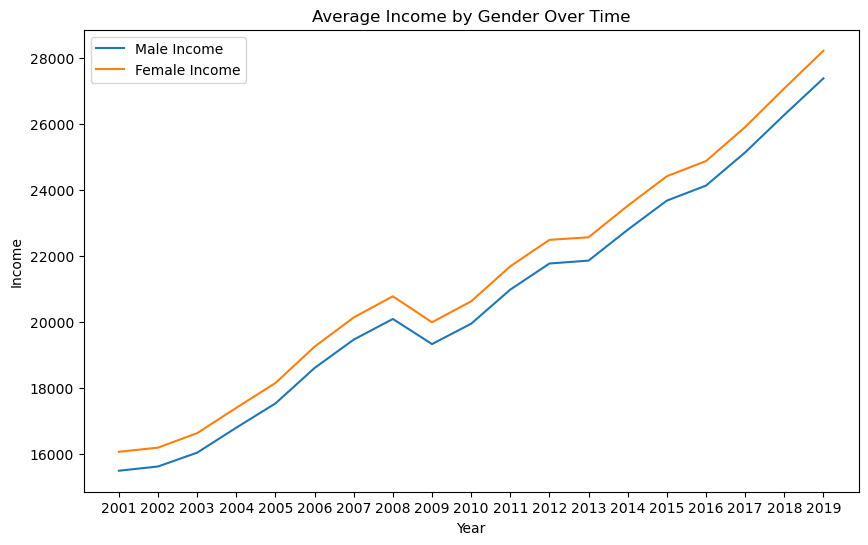

In [21]:
# Calculate average income for male and female populations
us_income['Male Income'] = us_income['BEA Per Capita Personal Income'] * (us_income['Male Population'] / us_income['Total Population'])
us_income['Female Income'] = us_income['BEA Per Capita Personal Income'] * (us_income['Female Population'] / us_income['Total Population'])

# Group by year and calculate average income for males and females
gender_income = us_income.groupby('Year')[['Male Income', 'Female Income']].mean()
print(gender_income)

# Plot income by gender over time
gender_income.plot(kind='line', figsize=(10, 6), title="Average Income by Gender Over Time", 
                   xticks=gender_income.index, ylabel="Income", xlabel="Year")
plt.show()

From 2001 to 2019, both male and female average incomes showed consistent growth, with female income exceeding male income every year. The gap between the two has remained relatively stable, averaging approximately \\$600–\\$900 annually. 

Initially, I expected the mean income of males to exceed that of females. Surprisingly, the summary statistics and plot reveal that female income consistently remained higher than male income. The higher income levels for females could reflect shifts in societal and workforce dynamics such as increasing educational attainment and workforce participation among women. However, further analysis is required to determine whether this pattern is influenced by regional or occupational factors or if it signals broader systemic changes.

#### 2.1.2. Income by Age Groups

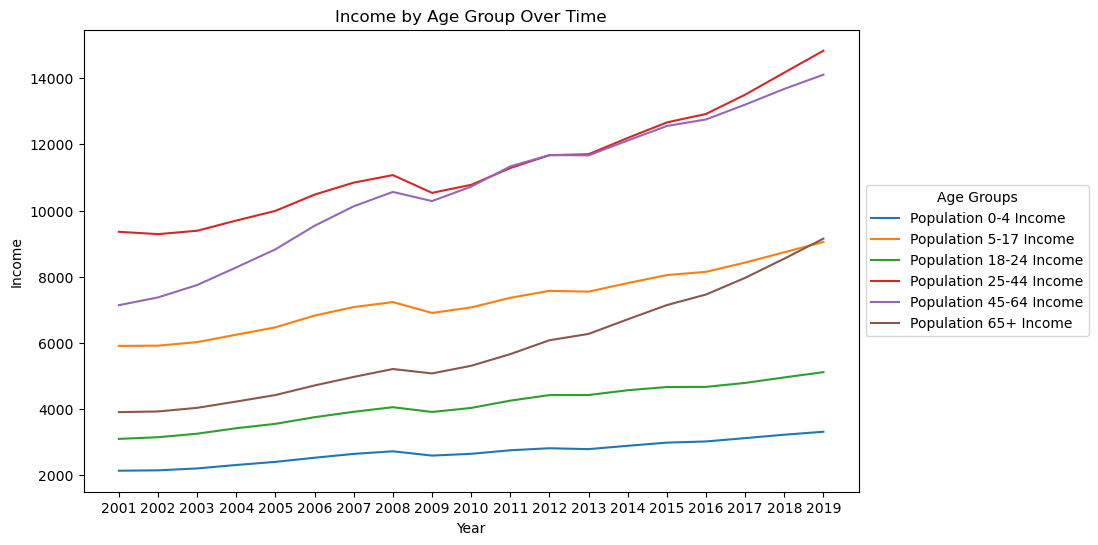

In [23]:
# Group by year and calculate average income for different age groups
age_groups = ['Population 0-4', 'Population 5-17', 'Population 18-24', 'Population 25-44', 
              'Population 45-64', 'Population 65+']
age_income = us_income[age_groups + ['BEA Per Capita Personal Income', 'Year']].copy()


# Calculate income for each age group
for age_group in age_groups:
    age_income[age_group + ' Income'] = us_income[age_group] * us_income['BEA Per Capita Personal Income'] / us_income['Total Population']

# Define columns for income by age groups
age_income_columns = [age + ' Income' for age in age_groups]

# Group by year and calculate average income for age groups
age_income_by_year = age_income.groupby('Year').mean()

# Plot income by age groups over time
age_income_by_year[age_income_columns].plot(title='Income by Age Group Over Time', 
                                            ylabel='Income', xlabel='Year', 
                                            kind='line', figsize=(10, 6), 
                                            xticks=age_income_by_year.index)

# Adjust legend
plt.legend(title='Age Groups', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

This plot shows income trends across different age groups from 2001 to 2019. Key observations include:

- **Population 25-44:** This group consistently exhibits the highest income levels throughout the period with a steady upward trend. This aligns with individuals establishing careers and reaching peak earning potential.
- **Population 45-64:** This group also shows a steady income growth, though at a slightly lower rate than the 25-44 age group. This could be attributed to factors like job stability and potential career advancement.
- **Population 0–4, 5–17, and 18–24** show minimal income growth over time and remain significantly lower compared to older age groups, reflecting their smaller earning potential. Surprisingly, population 5-17 has a higher income than population 18-24. This is an area that can benefit from further investigation to understand the underlying reasons.
- Income for **Population 65+** shows steady growth, reflecting the increasing financial contributions or economic activity of this demographic.
Overall, the data highlights that middle-aged groups (45–64 and 25–44) dominate income contributions, with a notable rise in older age groups (65+).

#### 2.1.3. Income by Geographic Region (based on State)

In [25]:
# To filter by state, select rows where the description does not contain a comma (',')
# This ensures the filter excludes counties and the 'U.S.' entry
states_only = income_by_demographics[(income_by_demographics['Description'].str.contains(',') == False) &
(income_by_demographics['Description'] != 'U.S.')].copy()

# Create a 'State' column from the 'Description' column for easier analysis
states_only['State'] = states_only['Description']

# Display unique state names to verify the filtering
print(states_only['State'].unique())
states_only

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Statefips  Countyfips Description  Year  Total Population  \
19             1           0     Alabama  2001         4467634.0   
20             1           0     Alabama  2002         4480089.0   
21             1           0     Alabama  2003         4503491.0   
22             1           0     Alabama  2004         4530729.0   
23             1           0     Alabama  2005         4569805.0   
...          ...         ...         ...   ...               ...   
59646         56           0     Wyoming  2015          585613.0   
59647         56           0     Wyoming  2016          584215.0   
59648         56           0     Wyoming  2017          578931.0   
59649         56           0     Wyoming  2018          577601.0   
59650         56           0     Wyoming  2019          578759.0   

       Population 0-4  Population 5-17  Population 18-24  Population 25-44  \
19           296624.0         823785.0          447963.0         1266952.0   
20           296046.0         820544.0          450657.0         1249808.0   
21           295204.0         817879.0          456549.0         1238460.0   
22           295970.0         817692.0          457934.0         1231571.0   
23           296441.0         820788.0          458170.0         1228586.0   
...               ...              ...               ...               ...   
59646         38469.0         101080.0           56209.0          152933.0   
59647         37889.0         100851.0           54752.0          152602.0   
59648         36698.0          99508.0           53069.0          150863.0   
59649         35787.0          98752.0           52614.0          150456.0   
59650         34931.0          98803.0           52521.0          150718.0   

       Population 45-64  Population 65+  Population Under 18  \
19            1048479.0        583831.0            1120409.0   
20            1077429.0        585605.0            1116590.0   
21            1105027.0        590372.0            1113083.0   
22            1133736.0        593826.0            1113662.0   
23            1163718.0        602102.0            1117229.0   
...                 ...             ...                  ...   
59646          151712.0         85210.0             139549.0   
59647          149767.0         88354.0             138740.0   
59648          146924.0         91869.0             136206.0   
59649          144467.0         95525.0             134539.0   
59650          142607.0         99179.0             133734.0   

       Population 18-54  Population 55+  Male Population  Female Population  \
19            2338370.0       1008855.0        2158138.0          2309496.0   
20            2330371.0       1033128.0        2165719.0          2314370.0   
21            2334366.0       1056042.0        2179422.0          2324069.0   
22            2337878.0       1079189.0        2192872.0          2337857.0   
23            2345987.0       1106589.0        2213382.0          2356423.0   
...                 ...             ...              ...                ...   
59646          279851.0        166213.0         299683.0           286706.0   
59647          275880.0        169595.0         298952.0           286291.0   
59648          270368.0        172357.0         295879.0           284115.0   
59649          267866.0        175196.0         295124.0           283930.0   
59650          267092.0        177933.0         295710.0           284406.0   

       BEA Per Capita Personal Income    State  
19                              25046  Alabama  
20                              25671  Alabama  
21                              26700  Alabama  
22                              28385  Alabama  
23                              29780  Alabama  
...                               ...      ...  
59646                           56122  Wyoming  
59647                           53421  Wyoming  
59648                           56377  Wyoming  
59649                           59195  Wyomin

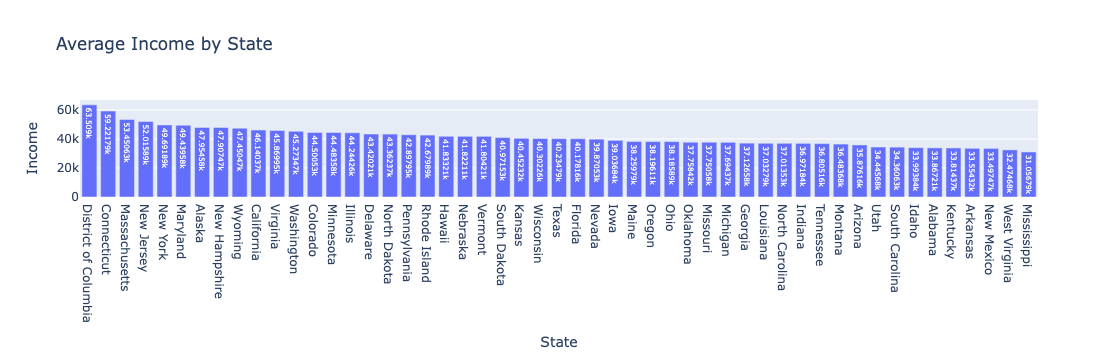

In [27]:
# Group by State and calculate average income per capita
state_income = states_only.groupby('State')[['BEA Per Capita Personal Income']].mean()

# Interactive bar plot by State
fig = px.bar(
    state_income.reset_index(),
    x='State',
    y='BEA Per Capita Personal Income',
    title='Average Income by State',
    labels={'BEA Per Capita Personal Income': 'Income'},
    text_auto=True
)

# Sort by income
fig.update_layout(xaxis={'categoryorder': 'total descending'}) 
fig.show()

The bar chart shows the average income for each state in the United States. The states are ranked in descending order of average income. Many states in the Northeast, such as the District of Columbia (\\$63K), Connecticut (\\$59K) and Massachusetts (\\$53K) consistently rank among the highest in income. This trend could be attributed to these states having the highest education levels in the country as higher education often correlates with higher-paying jobs.

In contrast, states like New Mexico (\\$33K), West Virginia (\\$32K) and Mississippi (\\$31K) are at the lower end of the income spectrum. These states may face challenges such as lower levels of educational attainment, fewer job opportunities and economic factors that impact income levels. Further exploration could investigate the relationship between education and income levels for deeper insights. Additionally, factors like industry distribution and state economic policies could provide a more comprehensive understanding of income disparities across the United States.

#### Visualize Income by State using Geocoding

In [30]:
# Create a new column 'state_loc' by using the geocoder with the apply() function

geolocator = Nominatim(user_agent="info348", timeout=3)
state_income = states_only.groupby('State')[['BEA Per Capita Personal Income']].mean().reset_index()

state_income["address"] = state_income['State'] + ", " + "USA"

state_income["state_loc"] = state_income["address"].apply(lambda x: geolocator.geocode(x, timeout=2))

In [32]:
# Extract latitude and longitude from the 'state_loc' column
state_income["latitude"] = state_income["state_loc"].apply(lambda loc: loc.latitude if loc else None)
state_income["longitude"] = state_income["state_loc"].apply(lambda loc: loc.longitude if loc else None)

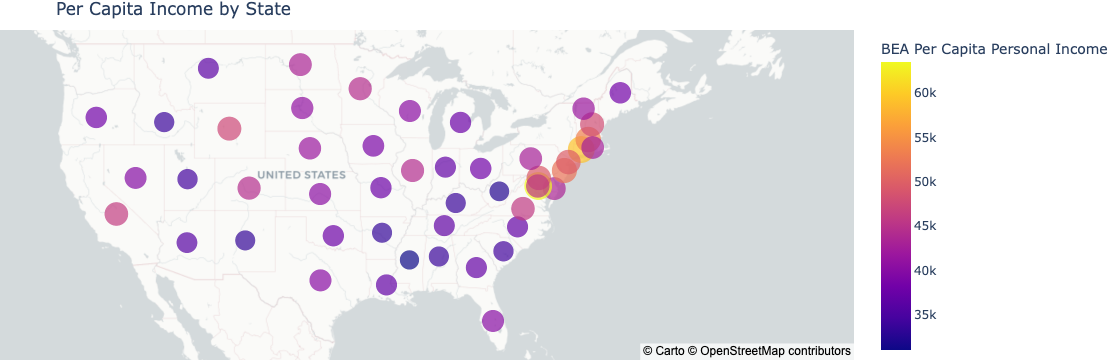

In [34]:
# Create the scatter mapbox plot with states' latitude and longitude
# Size and color points by 'BEA Per Capita Personal Income'

fig = px.scatter_mapbox(state_income,lat='latitude',lon='longitude', size='BEA Per Capita Personal Income',  
    color='BEA Per Capita Personal Income', hover_name='State', hover_data={'BEA Per Capita Personal Income': ':,.2f'}, 
    size_max=20, title='Per Capita Income by State',template='plotly',
    zoom=3,  # Initial zoom level
    mapbox_style='carto-positron'  # Map style
)

fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

The map illustrates the per capita personal income across different states in the United States. By using color-coded circles, the map visually represents the variation in income levels.

The Northeast region have significantly higher per capita incomes, represented by the yellow and orange circles. In contrast, states in the South and Midwest tend to have lower per capita incomes, shown by the purple and blue circles.
While most states follow the regional trend, some states might deviate. For example, Alaska, despite being a geographically remote state, has a relatively high per capita income due to factors like resource extraction and government subsidies.

The map's findings align with the bar plot above. Both visualizations confirm that the Northeast states generally have higher per capita incomes compared to other regions. This information can be useful for policymakers and researchers to understand regional economic differences and develop targeted policies to address income inequality.

### 2.2 Growth Rate of Income Over Time and Its Correlation with Population Demographics
#### Methods: Statistical Summarization, Statistical Associations and Visualization

In [36]:
# Calculate the growth rate of per capita income. Use the US-only dataframe to avoid duplication
us_income['Per Capita Income Growth Rate'] = us_income['BEA Per Capita Personal Income'].pct_change() * 100
us_income

Statefips  Countyfips Description  Year  Total Population  Population 0-4  \
0           0           0        U.S.  2001       284968955.0      19298217.0   
1           0           0        U.S.  2002       287625193.0      19429192.0   
2           0           0        U.S.  2003       290107933.0      19592446.0   
3           0           0        U.S.  2004       292805298.0      19785885.0   
4           0           0        U.S.  2005       295516599.0      19917400.0   
5           0           0        U.S.  2006       298379912.0      19938883.0   
6           0           0        U.S.  2007       301231207.0      20125962.0   
7           0           0        U.S.  2008       304093966.0      20271127.0   
8           0           0        U.S.  2009       306771529.0      20244518.0   
9           0           0        U.S.  2010       309321666.0      20188815.0   
10          0           0        U.S.  2011       311556874.0      20123103.0   
11          0           0        U.S.  2012       313830990.0      19976065.0   
12          0           0        U.S.  2013       315993715.0      19849215.0   
13          0           0        U.S.  2014       318301008.0      19872349.0   
14          0           0        U.S.  2015       320635163.0      19918078.0   
15          0           0        U.S.  2016       322941311.0      19921759.0   
16          0           0        U.S.  2017       324985539.0      19890972.0   
17          0           0        U.S.  2018       326687501.0      19762962.0   
18          0           0        U.S.  2019       328239523.0      19576683.0   

    Population 5-17  Population 18-24  Population 25-44  Population 45-64  \
0        53372958.0        27992652.0        84523274.0        64491563.0   
1        53507265.0        28480708.0        83990295.0        66695526.0   
2        53508312.0        28916746.0        83398001.0        68828899.0   
3        53511850.0        29302179.0        83066831.0        70935234.0   
4        53606269.0        29441546.0        82764185.0        73137401.0   
5        53818831.0        29602839.0        82638980.0        75216272.0   
6        53893443.0        29808025.0        82509693.0        77068373.0   
7        53833475.0        30194274.0        82399959.0        78617510.0   
8        53889649.0        30530346.0        82211153.0        80272688.0   
9        53931851.0        30762380.0        82191286.0        81769110.0   
10       53784421.0        31078554.0        82427353.0        82793428.0   
11       53720599.0        31371460.0        82801927.0        82830576.0   
12       53719487.0        31488416.0        83279411.0        83027731.0   
13       53691374.0        31416072.0        83849830.0        83314367.0   
14       53699973.0        31130843.0        84475800.0        83759699.0   
15       53727654.0        30801776.0        85191223.0        84096828.0   
16       53694374.0        30519684.0        86019996.0        84107109.0   
17       53556183.0        30373478.0        86823584.0        83801955.0   
18       53462467.0        30219206.0        87599465.0        83323439.0   

    Population 65+  Population Under 18  Population 18-54  Population 55+  \
0       35290291.0           72671175.0       151902194.0      60395586.0   
1       35522207.0           72936457.0       152463197.0      62225539.0   
2       35863529.0           73100758.0       153134701.0      63872474.0   
3       36203319.0           73297735.0       153998940.0      65508623.0   
4       36649798.0           73523669.0       154701635.0      67291295.0   
5       37164107.0           73757714.0       155527978.0      69094220.0   
6       37825711.0           74019405.0       156257657.0      70954145.0   
7       38777621.0           74104602.0       157054680.0      72934684.0   
8       39623175.0           74134167.0       157608587.0      75028775.0   
9       40478224.0           74120666.0       157940058.0      77260942.

In [38]:
growth_summary = us_income['Per Capita Income Growth Rate'].describe()
print(growth_summary)

count    18.000000
mean      3.218972
std       2.270948
min      -3.786655
25%       2.818545
50%       3.990943
75%       4.476238
max       6.094928
Name: Per Capita Income Growth Rate, dtype: float64


**Statistical summarization:** The income growth rate for the analyzed period (2001–2019) averaged 3.22%, with a standard deviation of 2.27%. This indicates moderate variability in growth rates across years. The maximum growth rate of 6.09% and the minimum of -3.79% suggest that while some years experienced robust growth, others saw declines, possibly linked to broader economic events such as the 2008 financial crisis.

Interestingly, the interquartile range (IQR: 2.82% to 4.48%) shows that most years exhibited steady growth, with the median growth rate at 3.99%. This aligns with general economic expansion trends during the period. However, the negative growth observed in some years highlights periods of economic contraction which may have disproportionately impacted certain regions or demographics.

The data suggest a generally positive trend for income growth but with noticeable disruptions. Further exploration could investigate how these fluctuations correlate with major economic events or demographic factors, providing a clearer picture of resilience and vulnerability within the economy.

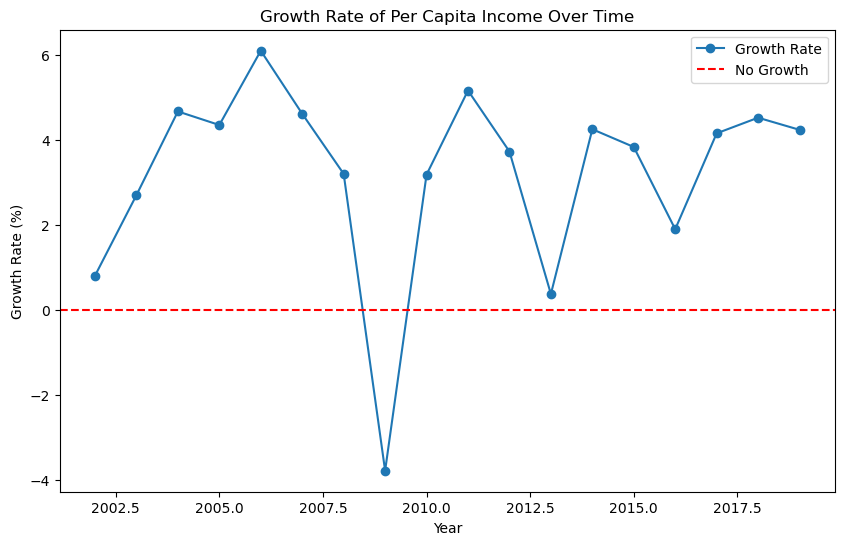

In [40]:
# Plot the growth rate over time
plt.figure(figsize=(10, 6))
plt.plot(us_income['Year'], us_income['Per Capita Income Growth Rate'], marker='o', label='Growth Rate')
plt.title('Growth Rate of Per Capita Income Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='red', linestyle='--', label='No Growth')
plt.legend()
plt.show()

The line chart illustrates the fluctuations in per capita income growth from 2001 to 2019. Initially, the growth rate shows a positive trajectory which indicates a period of economic prosperity. However, a significant dip around 2008 aligns with the global financial crisis which had a severe impact on economies worldwide, leading to a decline in income growth. Subsequently, the growth rate experiences a partial recovery but continues to exhibit volatility.

#### Statistical Associations: Correlations between Income and Demographics

In [42]:
# To correlate growth rates with age groups, calculate pairwise correlations.

# Select demographic columns
demographic_columns = ['Population 0-4', 'Population 5-17', 'Population 18-24', 'Population 25-44', 'Population 45-64', 'Population 65+']

# Calculate correlations with growth rate
correlation_results = us_income[['Per Capita Income Growth Rate'] + demographic_columns].corr()

# Display correlation values
print(correlation_results['Per Capita Income Growth Rate'])

Per Capita Income Growth Rate    1.000000
Population 0-4                  -0.089769
Population 5-17                 -0.159889
Population 18-24                -0.050767
Population 25-44                 0.164002
Population 45-64                 0.035943
Population 65+                   0.107773
Name: Per Capita Income Growth Rate, dtype: float64


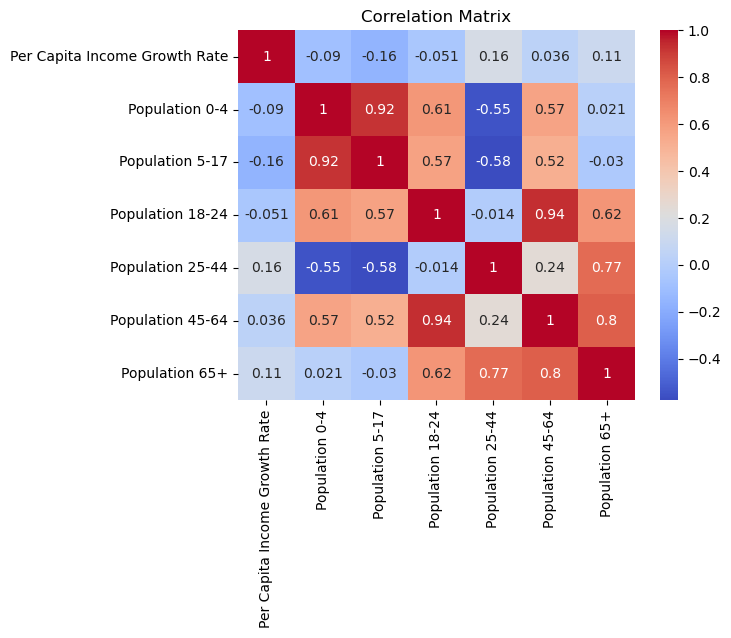

In [44]:
# Correlation heatmap for age groups and income
sns.heatmap(correlation_results, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- **Negative Correlations:** Younger age groups such as populations aged 0–4 (-0.09), 5–17 (-0.16) and 18–24 (-0.05) exhibit slight negative correlations with income growth rates. This suggests that regions with a higher proportion of younger populations may experience slightly lower income growth. This could be attributed to the economic dependency of these age groups as they are not directly contributing to the workforce.
  
- **Positive Correlations:** Middle-aged and older groups, particularly those aged 25–44 (0.16), 45-65 (0.036) and 65+ (0.11), show a positive correlation with income growth. The positive correlation for the 25–44 age group is expected as these individuals are typically in their prime working years which drives income growth. Interestingly, the 65+ group also correlates positively, potentially reflecting the economic contributions of retirees or income generated from pensions, investments or healthcare-related spending.
  
The data suggest that per capita income growth is most positively associated with middle-aged populations, reflecting their role as primary earners. In contrast, regions with higher proportions of younger populations might face slower income growth. 

### 2.3 Analyze the Correlation between Income and Life Expectancy
#### Methods: Statistical Associations and Visualization

#### Life Expectancy dataset

In [47]:
# Life Expectancy Estimates by Year, Gender, and Income Percentile dataset from Opportunity Insights
life_expectancy = pd.read_csv("health_ineq_online_table_2.csv")

#Rename columns 
life_expectancy = life_expectancy.rename(columns={
    'gnd': 'Gender',
    'pctile': 'Income Percentile',
    'year': 'Year',
    'count': 'Count',
    'hh_inc': 'Mean Household Income',
    'le_raceadj': 'Race-Adjusted Life Expectancy',
    'le_agg': 'Unadjusted Life Expectancy',
    'sd_le_raceadj': 'Standard Error of Race-Adjusted Life Expectancy',
    'sd_le_agg': 'Standard Error of Unadjusted Life Expectancy'})

life_expectancy

Gender  Income Percentile  Year   Count  Mean Household Income  \
0         F                  1  2001  398740           4.991094e+02   
1         F                  1  2002  411159           5.413069e+02   
2         F                  1  2003  420298           5.291391e+02   
3         F                  1  2004  427728           4.992995e+02   
4         F                  1  2005  433665           4.741454e+02   
...     ...                ...   ...     ...                    ...   
2795      M                100  2010  444908           1.915397e+06   
2796      M                100  2011  441576           1.595813e+06   
2797      M                100  2012  442401           1.828705e+06   
2798      M                100  2013  439032           1.809494e+06   
2799      M                100  2014  422080           1.334157e+06   

      Unadjusted Life Expectancy  Race-Adjusted Life Expectancy  \
0                       79.68207                       79.89346   
1                       79.18359                       79.41062   
2                       79.36441                       79.57217   
3                       79.89841                       80.09248   
4                       80.28360                       80.46593   
...                          ...                            ...   
2795                    88.76955                       88.86678   
2796                    88.60163                       88.71263   
2797                    88.12717                       88.25696   
2798                    88.82390                       88.93484   
2799                    89.69900                       89.78313   

      Standard Error of Unadjusted Life Expectancy  \
0                                         0.392838   
1                                         0.353981   
2                                         0.364781   
3                                         0.352019   
4                                         0.334612   
...                                            ...   
2795                                      0.524046   
2796                                      0.572685   
2797                                      0.632195   
2798                                      0.576337   
2799                                      0.485407   

      Standard Error of Race-Adjusted Life Expectancy  
0                                            0.385240  
1                                            0.346817  
2                                            0.359097  
3                                            0.347992  
4                                            0.330986  
...                                               ...  
2795                                         0.504820  
2796                                         0.552049  
2797                                         0.610853  
2798                                         0.556298  
2799                                         0.468213  

[2800 rows x 9 columns]

#### 2.3.1. Relationship between Income and Unadjusted Life Expectancy

corr: 0.35176393534391037 p-val: 2.377733671752838e-82


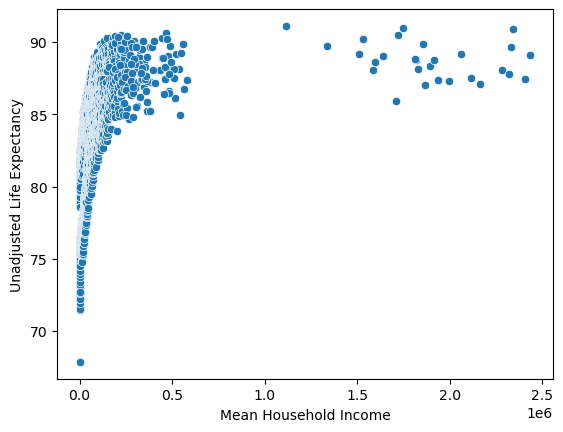

In [49]:
# Using Pearson's r and a scatterplot
corr_unadj, pval_unadj = st.pearsonr(life_expectancy['Mean Household Income'], life_expectancy['Unadjusted Life Expectancy'])
print("corr:", corr_unadj, "p-val:", pval_unadj)

plot = sns.scatterplot(data=life_expectancy, x='Mean Household Income', y='Unadjusted Life Expectancy')


- **Data Distribution:** There appears to be a weak positive correlation between the two variables as mean household income increases, unadjusted life expectancy tends to increase as well. The data points are clustered in the lower left corner of the plot, indicating that a majority of the observations have lower mean household income and lower unadjusted life expectancy. There is a wider spread of data points towards the right side of the plot which shows more variability in unadjusted life expectancy at higher income levels.


- **Correlation:** The correlation coefficient of 0.35 and a very small p-value of 2.37e-82 indicate a statistically significant positive correlation between the two variables. However, the correlation is weak, suggesting that other factors besides income likely influence unadjusted life expectancy.

While there is a positive association between mean household income and unadjusted life expectancy, the relationship is not very strong. This weak correlation might be attributed to the fact that the life expectancy measure is unadjusted, meaning other significant factors could also be at play. To gain a clearer understanding, I recalculated the correlation using race-adjusted life expectancy.

#### 2.3.2 Relationship between Income and Race-Adjusted Life Expectancy

corr: 0.3556033003333391 p-val: 3.0581283260912136e-84


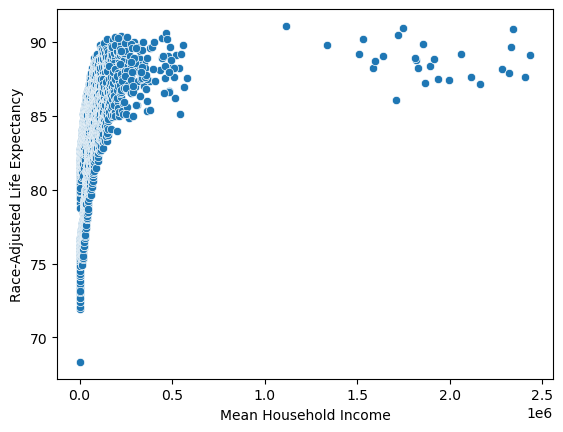

In [51]:
# Using Pearson's r and a scatterplot:
corr_raceadj, pval_raceadj = st.pearsonr(life_expectancy['Mean Household Income'], life_expectancy['Race-Adjusted Life Expectancy'])
print("corr:", corr_raceadj, "p-val:", pval_raceadj)

plot = sns.scatterplot(data=life_expectancy, x='Mean Household Income', y='Race-Adjusted Life Expectancy')

Initially, I expected that using race-adjusted life expectancy would yield a stronger correlation. However, the results were similar to those for unadjusted life expectancy. The correlation increased slightly from 0.352 to 0.356, indicating that it's still relatively low. Despite this, the correlation coefficient of 0.356 combined with the very low p-value confirms a statistically significant relationship between the two variables.

The scatterplot reveals a similar pattern with data points clustered in the lower left corner. This indicates that most observations have lower mean household income and lower unadjusted life expectancy. Toward the right side of the plot, there is a wider spread of data points which demonstrates more variability in life expectancy at higher income levels.

#### 2.3.3. Group by Income Percentile and Compare Life Expectancy

<Axes: xlabel='Income Percentile', ylabel='Race-Adjusted Life Expectancy'>

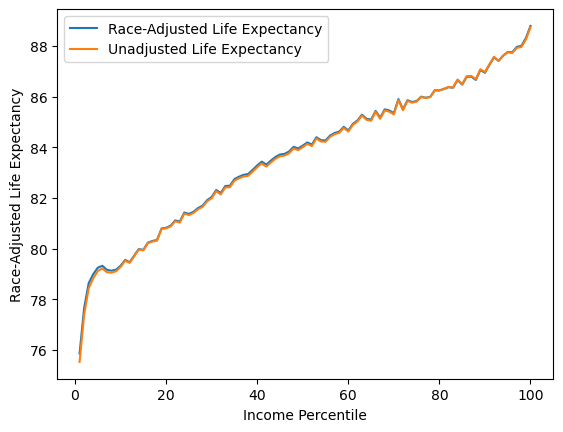

In [53]:
# Group by income percentile and calculate mean life expectancy
grouped_percentile = life_expectancy.groupby('Income Percentile')[['Race-Adjusted Life Expectancy', 
                                                                      'Unadjusted Life Expectancy']].mean().reset_index()

# Plot life expectancy by income percentile
sns.lineplot(data=grouped_percentile, x='Income Percentile', y='Race-Adjusted Life Expectancy',label='Race-Adjusted Life Expectancy')
sns.lineplot(data=grouped_percentile, x='Income Percentile', y='Unadjusted Life Expectancy', label='Unadjusted Life Expectancy')

I used a line chart to illustrate the relationship between income percentile and life expectancy, using different line colors to distinguish between unadjusted and race-adjusted life expectancy.

Both measures of life expectancy increase with rising income percentiles, indicating a positive correlation between income and life expectancy. The steepest increase in life expectancy occurs at the lower income percentiles, suggesting that improvements in health outcomes and life expectancy are more pronounced for individuals in lower-income groups. There is no significant difference between the unadjusted and race-adjusted life expectancy lines as they generally lie very close to each other. 

**Conclusion:** The analysis confirms that there is a correlation between income and life expectancy. However, the association is relatively weak. This suggests that while higher income does have a positive impact on life expectancy, other factors also play significant roles. One notable factor is access to healthcare. Wealthier individuals typically have better access to healthcare services which can contribute to longer life expectancy. Additionally, factors such as lifestyle choices, environmental conditions and education levels may also influence life expectancy. To gain a more comprehensive understanding of this relationship, further analysis could explore these variables and their combined effects on life expectancy.

### 2.4 Analyze the Correlation between Income and Race-Adjusted Life Expectancy by Gender
#### Methods: Statistical Associations and Visualization

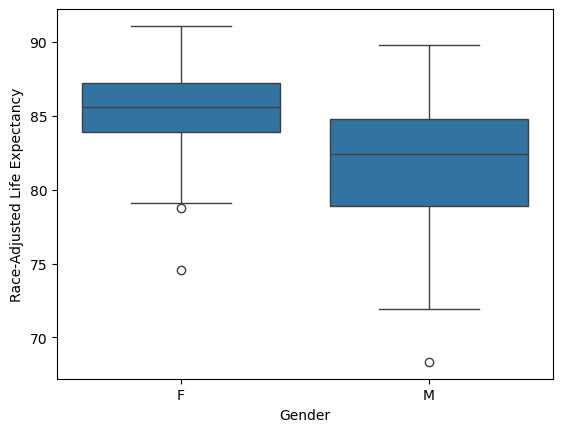

In [55]:
# First, visualize the distribution of Life Expectancy by Gender
plot = sns.boxplot(data=life_expectancy, x='Gender', y='Race-Adjusted Life Expectancy')

The boxplot reveals several  insights about life expectancy by gender:

- **Median:** Females generally have a slightly higher median life expectancy (around 86 years) compared to males (around 82 years).

- **Interquartile Range (IQR):** The IQR, represented by the box, is relatively narrow for females. In contrast, the IQR for males is slightly wider, reflecting greater variability in life expectancies among males.

- **Outliers:** There are two outliers below the lower whisker for females and one below for males. This indicates that a small number of individuals in both genders have significantly lower life expectancies compared to the majority.

#### Exploring Gender as an Influencing Factor
The previous section demonstrates that while income and life expectancy are related, other factors may also influence this relationship. To gain deeper insights, I will now incorporate gender to see how it may impact life expectancy. From the above boxplot, it is evident that females tend to have a higher life expectancy compared to males.

In [57]:
# Filter data by gender
male_data = life_expectancy[life_expectancy['Gender'] == 'M']
female_data = life_expectancy[life_expectancy['Gender'] == 'F']

# Calculate correlation for Male
corr_male, pval_male = st.pearsonr(male_data['Mean Household Income'], male_data['Race-Adjusted Life Expectancy'])
print("Male Correlation between Income and Race-Adjusted Life Expectancy: ", corr_male, "p-value: ", pval_male)

# Calculate correlation for Female
corr_female, pval_female = st.pearsonr(female_data['Mean Household Income'], female_data['Race-Adjusted Life Expectancy'])
print("Female Correlation between Income and Race-Adjusted Life Expectancy: ", corr_female, "p-value: ", pval_female)

Male Correlation between Income and Race-Adjusted Life Expectancy:  0.44139589270585056 p-value:  7.912319609590517e-68
Female Correlation between Income and Race-Adjusted Life Expectancy:  0.41911611518380293 p-value:  1.1595926029187112e-60


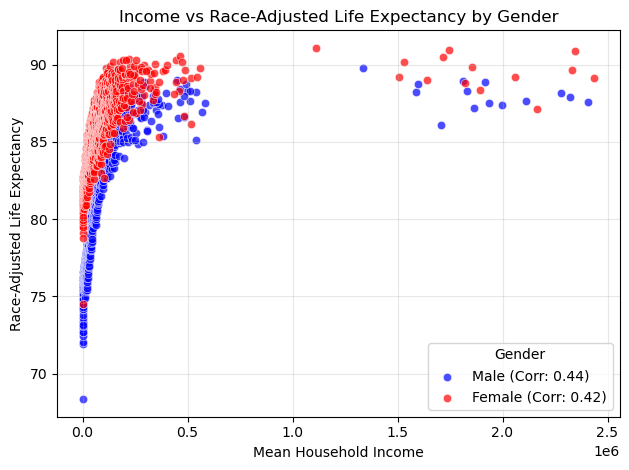

In [59]:
# Male data scatter plot
sns.scatterplot(
    x=male_data['Mean Household Income'],
    y=male_data['Race-Adjusted Life Expectancy'],
    label=f"Male (Corr: {corr_male:.2f})",
    color='blue',
    alpha=0.7
)

# Female data scatter plot
sns.scatterplot(
    x=female_data['Mean Household Income'],
    y=female_data['Race-Adjusted Life Expectancy'],
    label=f"Female (Corr: {corr_female:.2f})",
    color='red',
    alpha=0.7
)

plt.title('Income vs Race-Adjusted Life Expectancy by Gender')
plt.xlabel('Mean Household Income')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.legend(title='Gender')
plt.grid(alpha=0.3)

# Display plot
plt.tight_layout()
plt.show()

The scatterplot represents the relationship between mean household income and race-adjusted life expectancy for both males and females.

- **Data Distribution:** For both genders, there is a positive correlation between mean household income and race-adjusted life expectancy. This means that as income increases, life expectancy also tends to increase. The overall trend is similar for both males and females with data points clustering in the lower left corner (indicating lower incomes and life expectancies) and spreading out more at higher income levels. This pattern aligns with the previous section when gender was not considered.
  + **Female Life Expectancy**: The red dots representing females tend to cluster around a higher life expectancy range with less variability. This suggests that, on average, females have higher life expectancies compared to males and this trend remains consistent across different income levels.
  + **Male Life Expectancy**: The blue dots representing males show more variability, particularly at lower income levels. There are more instances of males with lower life expectancies which could be attributed to factors such as higher risk-taking behaviors or specific health conditions that disproportionately affect males.

- **Correlation:** The correlation coefficients for both males (0.44) and females (0.42) indicate a stronger relationship compared to when only income was correlated with life expectancy (around 0.3). Both correlations are statistically significant as indicated by the very low p-values, suggesting that the observed relationships are unlikely to be due to chance.

**Conclusion:** While higher income is associated with increased life expectancy for both genders, interestingly, females tend to have higher and more consistent life expectancies compared to males. Research into biological factors and social and behavioral factors could provide insights into this observation.

### 2.5 Predicting Race-Adjusted Life Expectancy based on Gender and Income
#### Methods: Statistical Associations, Visualization and Predictive modeling using scikit-learn

In [62]:
# Create a new DataFrame 'prediction_model' containing selected columns for life expectancy prediction
prediction_model = life_expectancy[['Race-Adjusted Life Expectancy','Gender', 'Mean Household Income', 'Income Percentile']].copy() 

# Since 'gender' is a binary variable, I convert it into a
# new binary numerical representation 'Gender_cat' (0 for 'F' and 1 for 'M')
dict_gender = {"M": 1, "F": 0}
prediction_model['Gender_cat'] = prediction_model['Gender'].map(dict_gender)
prediction_model

Race-Adjusted Life Expectancy Gender  Mean Household Income  \
0                          79.89346      F           4.991094e+02   
1                          79.41062      F           5.413069e+02   
2                          79.57217      F           5.291391e+02   
3                          80.09248      F           4.992995e+02   
4                          80.46593      F           4.741454e+02   
...                             ...    ...                    ...   
2795                       88.86678      M           1.915397e+06   
2796                       88.71263      M           1.595813e+06   
2797                       88.25696      M           1.828705e+06   
2798                       88.93484      M           1.809494e+06   
2799                       89.78313      M           1.334157e+06   

      Income Percentile  Gender_cat  
0                     1           0  
1                     1           0  
2                     1           0  
3                     1           0  
4                     1           0  
...                 ...         ...  
2795                100           1  
2796                100           1  
2797                100           1  
2798                100           1  
2799                100           1  

[2800 rows x 5 columns]

In [64]:
# Drop the 'Gender' column because it is not numerical and therefore cannot be used to calculate correlation
corr_model = prediction_model.drop(columns=['Gender']) 

# Calculate the correlation matrix for the numerical columns in the 'prediction_model' DataFrame
corr=corr_model.corr()
corr

Race-Adjusted Life Expectancy  \
Race-Adjusted Life Expectancy                       1.000000   
Mean Household Income                               0.355603   
Income Percentile                                   0.774063   
Gender_cat                                         -0.518740   

                               Mean Household Income  Income Percentile  \
Race-Adjusted Life Expectancy               0.355603       7.740633e-01   
Mean Household Income                       1.000000       4.651686e-01   
Income Percentile                           0.465169       1.000000e+00   
Gender_cat                                  0.010615      -6.611806e-16   

                                 Gender_cat  
Race-Adjusted Life Expectancy -5.187397e-01  
Mean Household Income          1.061456e-02  
Income Percentile             -6.611806e-16  
Gender_cat                     1.000000e+00

<Axes: >

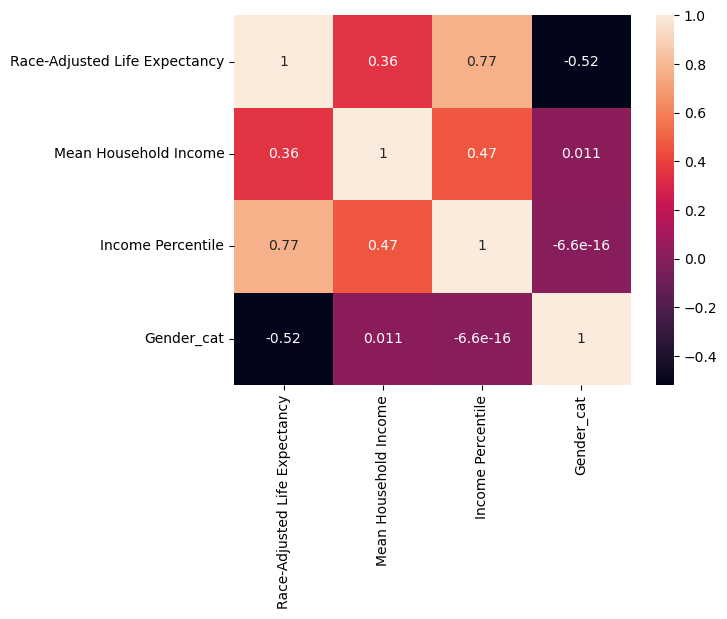

In [66]:
# A heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

**Positive Correlations:**
- **Race-Adjusted Life Expectancy and Income Percentile:** There is a strong positive correlation (0.77) between these two variables. This indicates that as income percentile increases, race-adjusted life expectancy tends to increase significantly.
- **Race-Adjusted Life Expectancy and Mean Household Income:** There is a moderate positive correlation (0.36) between these two variables. This suggests that as mean household income increases, race-adjusted life expectancy tends to increase as well.

**Negative Correlation:**
- **Race-Adjusted Life Expectancy and Gender_cat:** There is a moderate negative correlation (-0.52) between these two variables. This suggests that gender is associated with differences in race-adjusted life expectancy.

#### Linear Regression Analysis of Life Expectancy Using Statsmodels

In [68]:
# Regression analysis
prediction_model['life_expectancy']=prediction_model['Race-Adjusted Life Expectancy']
prediction_model['hh_income']=prediction_model['Mean Household Income']
prediction_model['income_pct']=prediction_model['Income Percentile']

# Use smf.ols function to generate the linear model (ordinary least squares regression)
# The formula specifies 'life_expectancy' as the dependent variable
# and 'gender', 'mean household income' and 'income percentile' as independent variables
lm = smf.ols('life_expectancy ~ Gender_cat + hh_income + income_pct', data=prediction_model).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     6143.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:57:56   Log-Likelihood:                -4721.7
No. Observations:                2800   AIC:                             9451.
Df Residuals:                    2796   BIC:                             9475.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.6669      0.056   1431.661      0.0

#### Interpreting Regression Output

- **Coefficients**

**Gender**  
When the gender is male, the model predicts an average decrease of 3.73 years in life expectancy, holding other variables constant. This result is statistically significant (p-value = 0.000).

**Mean Household Income**  
For each additional dollar increase in mean household income, the model predicts an average increase of approximately 0.00 years in life expectancy, holding other variables constant. However, this result is not statistically significant (p-value = 0.864).

**Income Percentile**  
For each unit increase in income percentile, the model predicts an average increase of about 0.0965 years in life expectancy, holding other variables constant. This result is statistically significant (p-value = 0.000).
  
- **Intercept**:

When all explanatory variables are equal to 0, the model predicts a race-adjusted life expectancy of 80.67 years.

- **P-value**:

The p-value associated with the f-statistic in this case is 0.00.  Because this is extremely small, we conclude that there is an actual relationship between the collection of explanatory variables and life expectancy.  

- **Adj R-squared**:

About 86.8% of the variation in the race-adjusted life expectancy is explained by the linear regression model.

**Conclusion:** The analysis demonstrates that gender and income percentile are significant predictors of race-adjusted life expectancy. Specifically, being male is associated with a reduction of 3.73 years in life expectancy, while each unit increase in income percentile predicts a modest but statistically significant increase of 0.0965 years. However, mean household income shows no significant impact on life expectancy which is unexpected. It seems counterintuitive that income percentile is significant while mean household income is not as both metrics are closely related. This discrepancy likely points to a limitation in the model or the data such as potential multicollinearity between the two variables or an inability to capture nuanced effects of absolute income levels.

While the model explains 86.8% of the variation in life expectancy, its simplicity may overlook important non-linear relationships or interactions. Further refinement, such as exploring additional variables or employing more complex modeling techniques, could provide a clearer understanding of these relationships.


#### Machine Learning Regression Analysis of Life Expectancy Using Scikit-Learn

After assessing significance through regression analysis, I applied a scikit-learn regression model to predict life expectancy.


In [70]:
# 1. Data Preprocessing: 

# Independent variables (Gender, Income, Income Percentile)
x = life_expectancy[['Gender', 'Mean Household Income', 'Income Percentile']]
# Dependent variable (Race-Adjusted Life Expectancy)
y = life_expectancy['Race-Adjusted Life Expectancy']

# Handle missing values if any
x = x.dropna()

# Ensure target variable aligns with the cleaned feature set
y = y[x.index]

In [72]:
# 2. Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
# 3. Set up the Linear Regression model
model = Pipeline(steps=[
    # Preprocessing step: Transform data using ColumnTransformer
    # Apply OneHotEncoder to the 'Gender' column to convert categorical data into binary format
    ('preprocessor', ColumnTransformer(transformers=[('gender', OneHotEncoder(), ['Gender']),
        ('num', 'passthrough', ['Mean Household Income', 'Income Percentile'])  ])),
    ('regressor', LinearRegression())]) # Regression step: Fit a linear regression model to the preprocessed data

In [76]:
# 4. Train the model
model.fit(x_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(x_test)

Mean Squared Error: 1.6742216394346714
R-squared: 0.8716903342453791


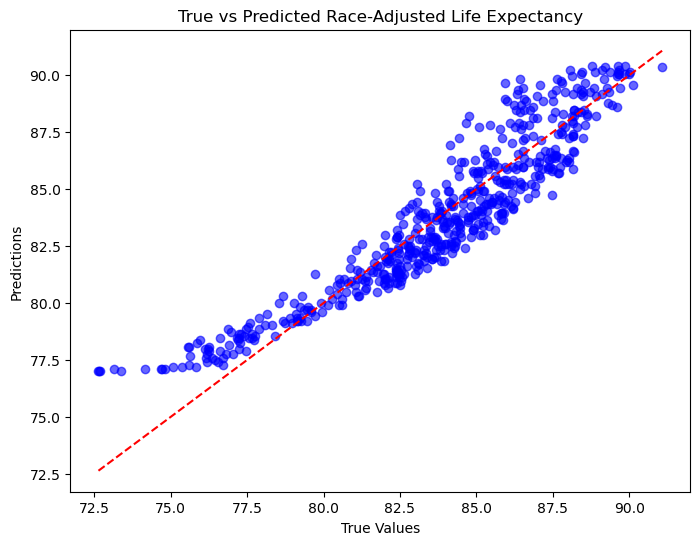

In [78]:
# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Race-Adjusted Life Expectancy')
plt.show()

This scatter plot displays the true values of race-adjusted life expectancy against their predicted values.
The points cluster closely around the red dashed line which represents the perfect prediction line. This indicates a strong positive correlation between the true and predicted values.

- **R-squared:** The R-squared value of 0.87 suggests that the model explains approximately 87.17% of the variance in the true values. This is a relatively high R-squared value, indicating a good fit of the model to the data.
- **Mean Squared Error (MSE):** The MSE of 1.67 represents the average squared difference between the true and predicted values. The relatively low MSE further supports the model's accuracy.

Overall, the scatter plot, along with the R-squared and MSE values, indicates that the model is performing well in predicting race-adjusted life expectancy. While the current linear regression model demonstrates good predictive power, it is relatively simple in complexity. This simplicity makes the model easy to interpret which is a significant advantage for communicating findings. However, there is room to explore more complex models such as Random Forests or neural networks. These advanced models might capture non-linear relationships and interactions between variables, potentially improving prediction accuracy.

## THANK YOU!